In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sales_dict= {'colour' : ['Yellow', 'Black', 'Blue','Red', 'Yellow', 'Black', 'Blue', 'Red',
'Yellow', 'Black', 'Blue', 'Red', 'Yellow', 'Black', 'Blue', 'Red', 'Blue', 'Red'],
'sales' : [100000, 150000, 80000, 90000, 200000, 145000, 120000, 300000, 250000, 200000,
160000, 90000, 90100, 150000, 142000, 130000, 400000, 350000],
'transactions' : [100, 150, 820, 920, 230, 120, 70, 250, 250, 110, 130, 860, 980, 300, 150, 170,
230, 280],
'product' : ['type A', 'type A', 'type A', 'type A', 'type A', 'type A', 'type A', 'type A',
'type A', 'type B', 'type B', 'type B', 'type B', 'type B', 'type B', 'type B', 'type B', 'type B']}

data_sales= pd.DataFrame(sales_dict)
data_sales

,colour,sales,transactions,product
0,Yellow,100000,100,type A
1,Black,150000,150,type A
2,Blue,80000,820,type A
3,Red,90000,920,type A
4,Yellow,200000,230,type A
5,Black,145000,120,type A
6,Blue,120000,70,type A
7,Red,300000,250,type A
8,Yellow,250000,250,type A
9,Black,200000,110,type B


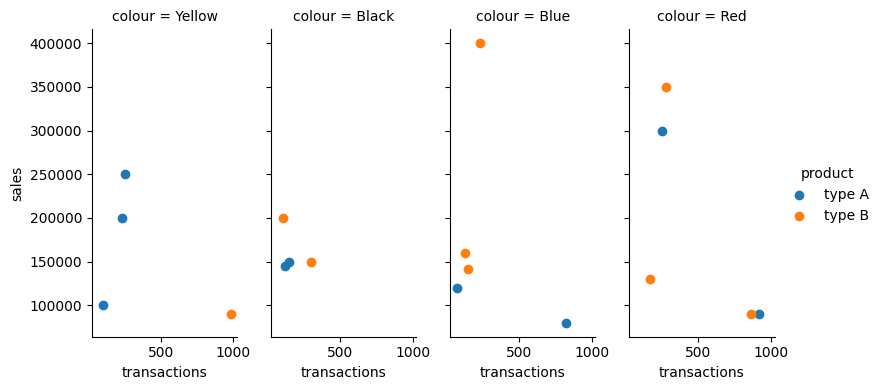

In [2]:
# Crea el entramado (facetgrid) vacio
graph = sns.FacetGrid(data_sales, col="colour",
height=4, hue= "product", aspect= 0.5)

# Carga los datos
graph.map(plt.scatter, "transactions", "sales")
# Añade llave
graph.add_legend()
plt.show()

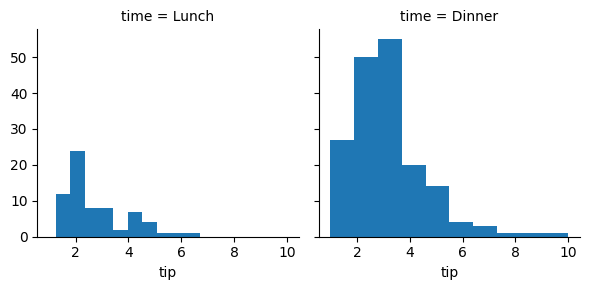

In [3]:
# Otro ejemplo con el dataset tips
import pandas as pd
#En este ejemplo usamos seaborn como sb
import seaborn as sb
from matplotlib import pyplot as plt
df = sb.load_dataset('tips')
g = sb.FacetGrid(df, col = "time")
# Ahora cargamos un histograma
g.map(plt.hist, "tip")
plt.show()

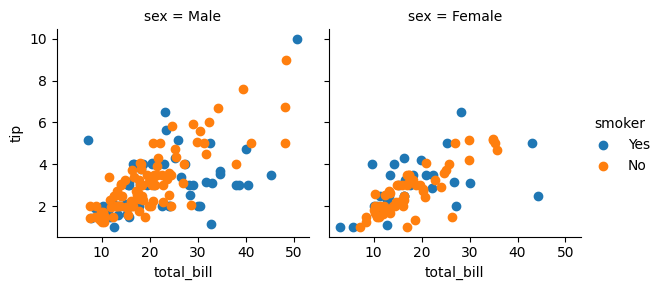

In [92]:
g = sb.FacetGrid(df, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip")
g.add_legend()
plt.show()

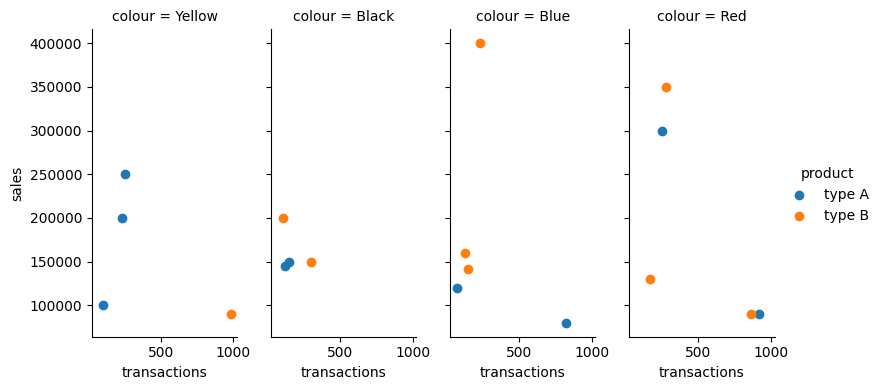

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crea el entramado (facetgrid) vacio
graph = sns.FacetGrid(data_sales, col="colour",
height=4, hue= "product", aspect= 0.5)

# Carga los datos
graph.map(plt.scatter, "transactions", "sales")
# Añade llave
graph.add_legend()
plt.show()

In [5]:
# Split: agrupa la columna "colour"

data_gby = data_sales.groupby('colour')

print(type(data_gby))
# comprobemos los nombres de los grupos
data_gby.groups

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


{'Black': [1, 5, 9, 13], 'Blue': [2, 6, 10, 14, 16], 'Red': [3, 7, 11, 15, 17], 'Yellow': [0, 4, 8, 12]}

In [95]:
# Paso 2 Aplicar: En este caso, usaremos "agregación" mediante .sum()
data_prod_colour_index=data_sales.groupby(['product',
'colour'], as_index= True).sum() # Note: as_index= True
data_prod_colour_index

sales  transactions
product colour                      
type A  Black   295000           270
        Blue    200000           890
        Red     390000          1170
        Yellow  550000           580
type B  Black   350000           410
        Blue    702000           510
        Red     570000          1310
        Yellow   90100           980

In [6]:
# Usando as_index = False
data_prod_colour_Noindex=data_sales.groupby(["product", 'colour'],as_index=False).sum()

data_prod_colour_Noindex

,product,colour,sales,transactions
0,type A,Black,295000,270
1,type A,Blue,200000,890
2,type A,Red,390000,1170
3,type A,Yellow,550000,580
4,type B,Black,350000,410
5,type B,Blue,702000,510
6,type B,Red,570000,1310
7,type B,Yellow,90100,980


In [101]:
# Agregar una supracolumna
data_sales.groupby(['product','colour'],
as_index=True).agg({'sales':np.sum,'transactions':[np.median,'count']})

sales transactions      
                   sum       median count
product colour                           
type A  Black   295000        135.0     2
        Blue    200000        445.0     2
        Red     390000        585.0     2
        Yellow  550000        230.0     3
type B  Black   350000        205.0     2
        Blue    702000        150.0     3
        Red     570000        280.0     3
        Yellow   90100        980.0     1

In [7]:
# Aplicar la función de transformación (desviación estándar:std()) sobre la columna de ventas agrupadas
# por columna de producto.
# Hay que tener en cuenta que la salida tiene el
# mismo número de filas que en la entrada

data_sales['sales_product_std'] = data_sales.groupby('product',as_index=True)['sales'].transform('std')
data_sales.loc[:,['colour','product','sales','transactions', 'sales_product_std']]

,colour,product,sales,transactions,sales_product_std
0,Yellow,type A,100000,100,75929.426297
1,Black,type A,150000,150,75929.426297
2,Blue,type A,80000,820,75929.426297
3,Red,type A,90000,920,75929.426297
4,Yellow,type A,200000,230,75929.426297
5,Black,type A,145000,120,75929.426297
6,Blue,type A,120000,70,75929.426297
7,Red,type A,300000,250,75929.426297
8,Yellow,type A,250000,250,75929.426297
9,Black,type B,200000,110,110783.301991


In [8]:
## Usando la función personalizada para transformar.
#Estandarización de la columna 'sales' agrupada por la
#columna 'colour'.

data_sales['sales_stdzed_colour'] = data_sales.groupby('colour')['sales'].transform(lambda x: (x-x.mean())/x.std())

print(data_sales.loc[:,['colour', 'sales','sales_stdzed_colour']])

    colour   sales  sales_stdzed_colour
0   Yellow  100000            -0.770946
1    Black  150000            -0.433682
2     Blue   80000            -0.794706
3      Red   90000            -0.824083
4   Yellow  200000             0.513429
5    Black  145000            -0.626430
6     Blue  120000            -0.478090
7      Red  300000             0.872558
8   Yellow  250000             1.155617
9    Black  200000             1.493795
10    Blue  160000            -0.161474
11     Red   90000            -0.824083
12  Yellow   90100            -0.898099
13   Black  150000            -0.433682
14    Blue  142000            -0.303951
15     Red  130000            -0.500913
16    Blue  400000             1.738221
17     Red  350000             1.276520


In [111]:
## Cálculo de la media a nivel de grupo y su difusión
#en el marco de datos original.

data_sales['X.mean'] = data_sales.groupby('colour')['sales'].transform('mean')

## Cálculo de la desviación estándar a nivel de grupo
#y su difusión en el marco de datos original.

data_sales['X.std'] = data_sales.groupby('colour')['sales'].transform('std')

## Estandarización simple por filas basada en las
# columnas X, X.mean , y X.std

data_sales['simple_stdzed'] = (data_sales['sales']- data_sales['X.mean'])/data_sales['X.std']

## Imprime tanto la columna transformada como la
#columna con cálculo simple y observa la diferencia
#entre ambas.

## Ambas columnas 'simple_stdzed', y 'sales_stdzed_colour' son exactamente iguales.

## La media y la desviación estándar se han calculado
#en función de los grupos, por lo que podemos ver que
#los valores (X.media, X.std) se repiten para los
#mismos colores.

print(data_sales.loc[:,['colour','sales','X.mean','X.std','simple_stdzed','sales_stdzed_colour']])

    colour   sales    X.mean          X.std  simple_stdzed   
0   Yellow  100000  160025.0   77858.862694      -0.770946  \
1    Black  150000  161250.0   25940.637360      -0.433682   
2     Blue   80000  180400.0  126336.059777      -0.794706   
3      Red   90000  192000.0  123773.987574      -0.824083   
4   Yellow  200000  160025.0   77858.862694       0.513429   
5    Black  145000  161250.0   25940.637360      -0.626430   
6     Blue  120000  180400.0  126336.059777      -0.478090   
7      Red  300000  192000.0  123773.987574       0.872558   
8   Yellow  250000  160025.0   77858.862694       1.155617   
9    Black  200000  161250.0   25940.637360       1.493795   
10    Blue  160000  180400.0  126336.059777      -0.161474   
11     Red   90000  192000.0  123773.987574      -0.824083   
12  Yellow   90100  160025.0   77858.862694      -0.898099   
13   Black  150000  161250.0   25940.637360      -0.433682   
14    Blue  142000  180400.0  126336.059777      -0.303951   
15     R

In [143]:
# Filtracion

grouped = data_sales.groupby("colour")

Blue_avg_transaction = grouped['transactions','sales'].mean().loc['Blue','transactions']
Black_avg_transaction = grouped['transactions','sales'].mean().loc['Black','transactions']
Yellow_avg_transaction = grouped['transactions','sales'].mean().loc['Yellow','transactions']
Red_avg_transaction = grouped['transactions','sales'].mean().loc['Red','transactions']

print('Blue_avg_transaction: ', Blue_avg_transaction)
print('Black_avg_transaction:', Black_avg_transaction)
print("Yellow_avg_transaction:", Yellow_avg_transaction)
print('Red_avg_transaction:', Red_avg_transaction)

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [9]:
## Función de agregación mean() aplicada a una sola columna "sales".
#Tenga en cuenta también as_index=True.
d1 = data_sales.groupby('colour', as_index=True)['sales'].mean()
type(d1) ## La salida es la Serie Pandas
print(d1)

colour
Black     161250.0
Blue      180400.0
Red       192000.0
Yellow    160025.0
Name: sales, dtype: float64


In [118]:
## Función de agregación mean() aplicada sólo a dos columnas
d2 = data_sales.groupby('colour',as_index=True).agg({'sales':np.mean, 'transactions': np.sum})
type(d2) ## La salida es DataFrame Pandas
print(d2)

           sales  transactions
colour                        
Black   161250.0           680
Blue    180400.0          1400
Red     192000.0          2480
Yellow  160025.0          1560


In [55]:
gapminder_csv_url = "http://bit.ly/2cLzoxH" 
gapminder = pd.read_csv(gapminder_csv_url)
print(gapminder.head(10))

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3  Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4  Afghanistan  1972  13079460.0      Asia   36.088  739.981106
5  Afghanistan  1977  14880372.0      Asia   38.438  786.113360
6  Afghanistan  1982  12881816.0      Asia   39.854  978.011439
7  Afghanistan  1987  13867957.0      Asia   40.822  852.395945
8  Afghanistan  1992  16317921.0      Asia   41.674  649.341395
9  Afghanistan  1997  22227415.0      Asia   41.763  635.341351


In [56]:
gapminder.info()
gapminder.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   year       1704 non-null   int64  
 2   pop        1704 non-null   float64
 3   continent  1704 non-null   object 
 4   lifeExp    1704 non-null   float64
 5   gdpPercap  1704 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 80.0+ KB


,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [80]:
grupo_año= gapminder.groupby(['country', 'year'])[['lifeExp', 'gdpPercap']].agg('mean').round(2)
print(grupo_año)

                  lifeExp  gdpPercap
country     year                    
Afghanistan 1952    28.80     779.45
            1957    30.33     820.85
            1962    32.00     853.10
            1967    34.02     836.20
            1972    36.09     739.98
...                   ...        ...
Zimbabwe    1987    62.35     706.16
            1992    60.38     693.42
            1997    46.81     792.45
            2002    39.99     672.04
            2007    43.49     469.71

[1704 rows x 2 columns]


In [50]:
print(gapminder)

          country  year         pop continent  lifeExp   gdpPercap
0     Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1     Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2     Afghanistan  1962  10267083.0      Asia   31.997  853.100710
3     Afghanistan  1967  11537966.0      Asia   34.020  836.197138
4     Afghanistan  1972  13079460.0      Asia   36.088  739.981106
...           ...   ...         ...       ...      ...         ...
1699     Zimbabwe  1987   9216418.0    Africa   62.351  706.157306
1700     Zimbabwe  1992  10704340.0    Africa   60.377  693.420786
1701     Zimbabwe  1997  11404948.0    Africa   46.809  792.449960
1702     Zimbabwe  2002  11926563.0    Africa   39.989  672.038623
1703     Zimbabwe  2007  12311143.0    Africa   43.487  469.709298

[1704 rows x 6 columns]


In [75]:
grupo_año = gapminder.groupby('country')['year'].agg({'pop': 'sum', 'lifeExp': 'mean', 'gdpPercap': 'median'})
print(grupo_año)

SpecificationError: nested renamer is not supported

In [43]:
gapminder.drop(['country'],inplace=True,axis=1)

In [32]:
table = pd.pivot_table(data=gapminder,index=["continent"])
table

,gdpPercap,lifeExp,pop,year
continent,,,,
Africa,2193.754578,48.865330,9.916003e+06,1979.5
Americas,7136.110356,64.658737,2.450479e+07,1979.5
Asia,7902.150428,60.064903,7.703872e+07,1979.5
Europe,14469.475533,71.903686,1.716976e+07,1979.5
Oceania,18621.609223,74.326208,8.874672e+06,1979.5
